In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown
# from google.colab import files
# uploaded = files.upload()

### Prikazy na stiahnutie z excelu a ulozenie do csv kvoli nacitavaniu
# dog_info = pd.read_excel("data-for-publication.xlsx", sheet_name="Information", header=0)
# dog_info.to_csv("psy_info.csv")
# files.download("psy_info.csv")

In [4]:
dogs = pd.read_csv("psy_data.csv", header=0).set_index("dog.id")
display(dogs.head())
dog_info = pd.read_csv("psy_info.csv", header=1)
print(dogs.columns[10:100])


,breed_group,sex,sterilization_status,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,Personality_age,...,Vas_8_excessive,Vas_9_alwaysplay,Vas_10_complicatedtasks,Vas_11_reacthastily,Vas_12_easilydistracted,Vas_13_cannotwait,impulsive,impulsiveness_disturbes,inattention_score,impulsivity_score
dog.id,,,,,,,,,,,,,,,,,,,,,
1,Jack_Russell_Terrier,female,sterilized,14.241650,14.181420,14.236174,14.233437,14.181420,14.236174,14.044534,...,2.0,3.0,2.0,2.0,3.0,2.0,0.0,3.0,0.993593,0.097521
2,Jack_Russell_Terrier,female,intact,8.693866,8.359294,8.693866,8.353818,NaN,8.422270,8.685652,...,2.0,3.0,1.0,1.0,2.0,2.0,NaN,2.0,-0.633266,0.904661
3,Pinschers_Schnauzers,male,intact,1.992701,1.992701,1.992701,1.992701,1.992701,1.992701,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN
4,Pinschers_Schnauzers,male,sterilized,5.405751,5.405751,5.405751,5.405751,5.405751,5.405751,NaN,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,-0.528441,-0.822966
5,German_Shepherd_Dog,male,sterilized,3.875205,4.006568,3.875205,4.006568,4.006568,4.006568,4.006568,...,3.0,3.0,2.0,2.0,4.0,2.0,1.0,5.0,0.347356,1.438794


Index(['weight_kg', 'ownership_reason', 'obtained_from', 'age_enter_household',
       'weaning_age', 'Socialization_men', 'Socialization_women',
       'Socialization_children', 'Socialization_dogs', 'Socialization_city',
       'Socialization_car', 'Socialization_public.transportation',
       'socialization', 'socialization_quantile', 'living_place',
       'living_building', 'outdoor_access', 'other_dogs_when_obtained',
       'currently_other_dogs', 'daily_exercise', 'leashed_unleashed',
       'trains_agility', 'trains_obedience_rally', 'trains_nose_work',
       'trains_rescue_utility', 'hobby_frequency_home', 'hobby_frequency_out',
       'alone_time', 'life_experience', 'dog_experience', 'dog_breeder',
       'animal-related_work', 'Willing_to_learn', 'Playful_dogs',
       'Predictable', 'Obedient', 'Boisterous', 'Sensitive_touch', 'Vocal',
       'Anxious', 'Independent', 'Lazy', 'Intelligent', 'Reliable',
       'Prey_driven_chase', 'Human_dependent', 'Wary', 'Erratic', 'St

### Vyssie som stiahol data a ulozil ich v csv formate, a vyrobil hlavny dataframe 'dogs', a dogs info
dalej urobim nejake grafy ohladne agresivity psov


mnozstvo plemien: 52
jednotlive plemena:


breed_group
Whippet                                1.043243
Bull_type_terriers                     1.054054
Golden_Retriever                       1.056604
Shetland_Sheepdog                      1.068323
Labrador_Retriever                     1.072115
Schapendoes                            1.082569
Hunting_terriers                       1.088710
Northern_companion_spitz               1.093596
Finnish_Lapphund                       1.094162
European_sighthounds                   1.099526
Nova_Scotia_Duck_Tolling_Retriever     1.117241
Sled_dogs                              1.119048
Pointers                               1.125436
Mastiff_type_dogs                      1.128527
Bernese_Mountain_Dogs                  1.132184
Welsh_Corgis                           1.138158
Scenthounds                            1.141509
Jack_Russell_Terrier                   1.145349
Lapponian_Herder                       1.152709
Border_Collie                          1.153846
Northern_hunting_spitz      

mnozstvo samcov: 7237
mnozstvo samic: 8134


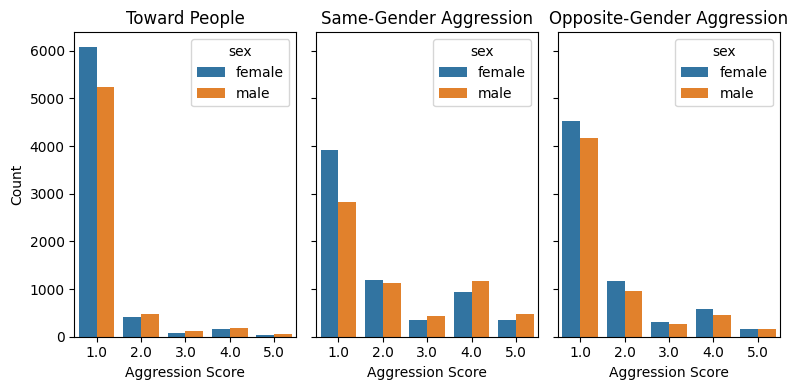

In [5]:
print('mnozstvo plemien:', len(dogs["breed_group"].unique()))
a = dogs.groupby("breed_group")["Aggressive_people"].mean(numeric_only=True)
print("jednotlive plemena:")
display(a.sort_values())

print('mnozstvo samcov:', len(dogs.query("sex=='male'")))
print('mnozstvo samic:', len(dogs.query("sex=='female'")))

male_count = len(dogs.query("sex=='male'"))
female_count = len(dogs.query("sex=='female'"))


plot, axes = plt.subplots(1, 3, figsize=(8, 4), sharey=True)

# dogs
sns.countplot(data=dogs, hue="sex", x='Aggressive_people', ax=axes[0])
axes[0].set(title='Toward People', xlabel='Aggression Score', ylabel='Count')

sns.countplot(data=dogs, hue="sex", x='Aggressive_dogs_samegender', ax=axes[1])
axes[1].set(title='Same-Gender Aggression', xlabel='Aggression Score', ylabel='Count')

sns.countplot(data=dogs, hue="sex", x='Aggressive_dogs_oppositegender', ax=axes[2])
axes[2].set(title='Opposite-Gender Aggression', xlabel='Aggression Score', ylabel='Count')

plot.tight_layout()
plt.show()

,Aggressive_dogs_samegender
sex,
female,6747
male,6022


,breed_group,sex,sterilization_status,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,Personality_age,...,Vas_8_excessive,Vas_9_alwaysplay,Vas_10_complicatedtasks,Vas_11_reacthastily,Vas_12_easilydistracted,Vas_13_cannotwait,impulsive,impulsiveness_disturbes,inattention_score,impulsivity_score
dog.id,,,,,,,,,,,,,,,,,,,,,
1,Jack_Russell_Terrier,female,sterilized,14.241650,14.181420,14.236174,14.233437,14.181420,14.236174,14.044534,...,2.0,3.0,2.0,2.0,3.0,2.0,0.0,3.0,0.993593,0.097521
2,Jack_Russell_Terrier,female,intact,8.693866,8.359294,8.693866,8.353818,NaN,8.422270,8.685652,...,2.0,3.0,1.0,1.0,2.0,2.0,NaN,2.0,-0.633266,0.904661
3,Pinschers_Schnauzers,male,intact,1.992701,1.992701,1.992701,1.992701,1.992701,1.992701,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN
4,Pinschers_Schnauzers,male,sterilized,5.405751,5.405751,5.405751,5.405751,5.405751,5.405751,NaN,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,-0.528441,-0.822966
5,German_Shepherd_Dog,male,sterilized,3.875205,4.006568,3.875205,4.006568,4.006568,4.006568,4.006568,...,3.0,3.0,2.0,2.0,4.0,2.0,1.0,5.0,0.347356,1.438794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15367,Labrador_Retriever,male,sterilized,4.515599,4.515599,4.515599,4.515599,4.515599,4.515599,4.515599,...,3.0,3.0,1.0,2.0,2.0,2.0,0.0,4.0,0.002578,1.165461
15368,Labrador_Retriever,male,intact,NaN,NaN,NaN,NaN,NaN,NaN,3.025325,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15369,Pointers,female,intact,5.315693,NaN,5.315693,5.315693,5.315693,NaN,5.315693,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


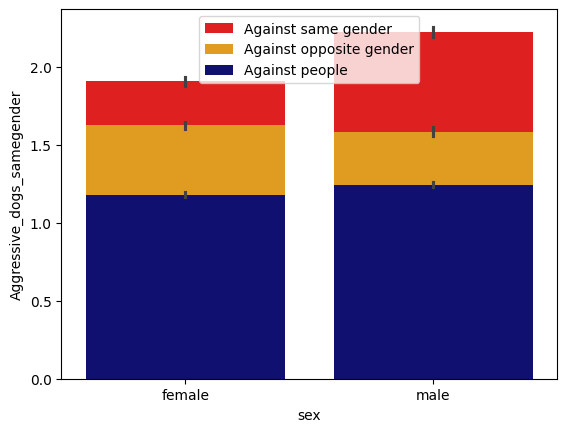

In [6]:

q = pd.DataFrame(dogs.groupby("sex")["Aggressive_dogs_samegender"].count())
display(q)

sns.barplot(data=dogs, x="sex", y="Aggressive_dogs_samegender", color="red", label="Against same gender" )
sns.barplot(data=dogs, x="sex", y="Aggressive_dogs_oppositegender", color="orange", label="Against opposite gender")
sns.barplot(data=dogs, x="sex", y="Aggressive_people", color="navy", label="Against people")
display(dogs)



,intact,sterilized,sterilization_status
index,,,
Intelligent,4.446268,4.379128,Intelligent
Reliable,3.680196,3.620952,Reliable
Prey_driven_chase,3.658797,3.517332,Prey_driven_chase
Human_dependent,2.997843,3.125208,Human_dependent
Wary,2.149127,2.351987,Wary
Erratic,1.470636,1.553424,Erratic
Stubborn,2.738665,2.748926,Stubborn
Fearful_people,1.357143,1.485969,Fearful_people
Playful_people,4.369390,4.149736,Playful_people


,sterilization_status,variable,value
0,Intelligent,intact,4.446268
1,Reliable,intact,3.680196
2,Prey_driven_chase,intact,3.658797
3,Human_dependent,intact,2.997843
4,Wary,intact,2.149127
5,Erratic,intact,1.470636
6,Stubborn,intact,2.738665
7,Fearful_people,intact,1.357143
8,Playful_people,intact,4.369390
9,Playful_alone,intact,3.502341


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Intelligent'),
  Text(1, 0, 'Reliable'),
  Text(2, 0, 'Prey_driven_chase'),
  Text(3, 0, 'Human_dependent'),
  Text(4, 0, 'Wary'),
  Text(5, 0, 'Erratic'),
  Text(6, 0, 'Stubborn'),
  Text(7, 0, 'Fearful_people'),
  Text(8, 0, 'Playful_people'),
  Text(9, 0, 'Playful_alone')])

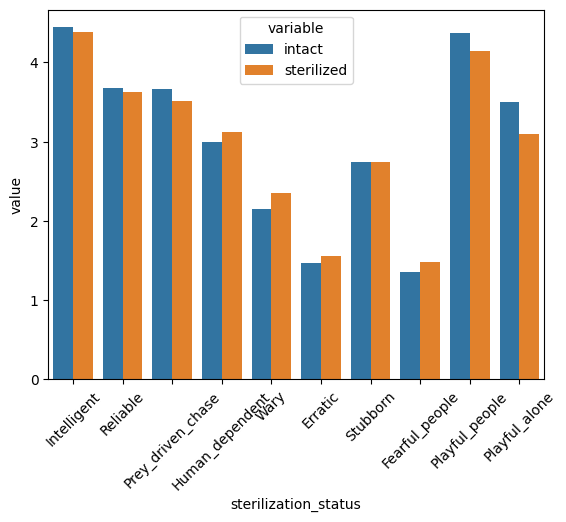

In [7]:
kastracia = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[26:36]
kastracia["sterilization_status"] = kastracia.index
kastracia.index.name = "index"
kastracia.columns.name = None
kastracia.reset_index()
display(kastracia)




dogs_melted = (kastracia.melt(id_vars=["sterilization_status"]))
display(dogs_melted)
dogs_melted = dogs_melted.set_index("sterilization_status")


# axes = sns.barplot(data=kastracia, x=kastracia.index, y="intact")
# axes = sns.barplot(data=kastracia, x=kastracia.index, y="sterilized")
# plt.xticks(rotation=45)
# figure, axes = plt.subplots(1, 3)

axes1 = sns.barplot(data=dogs_melted, x=dogs_melted.index, y="value", hue="variable")

plt.xticks(rotation=45)

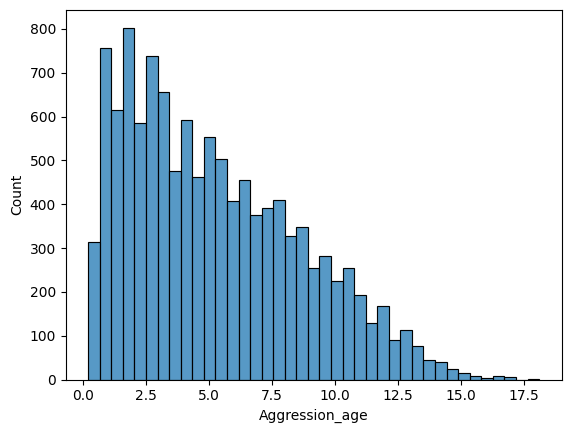

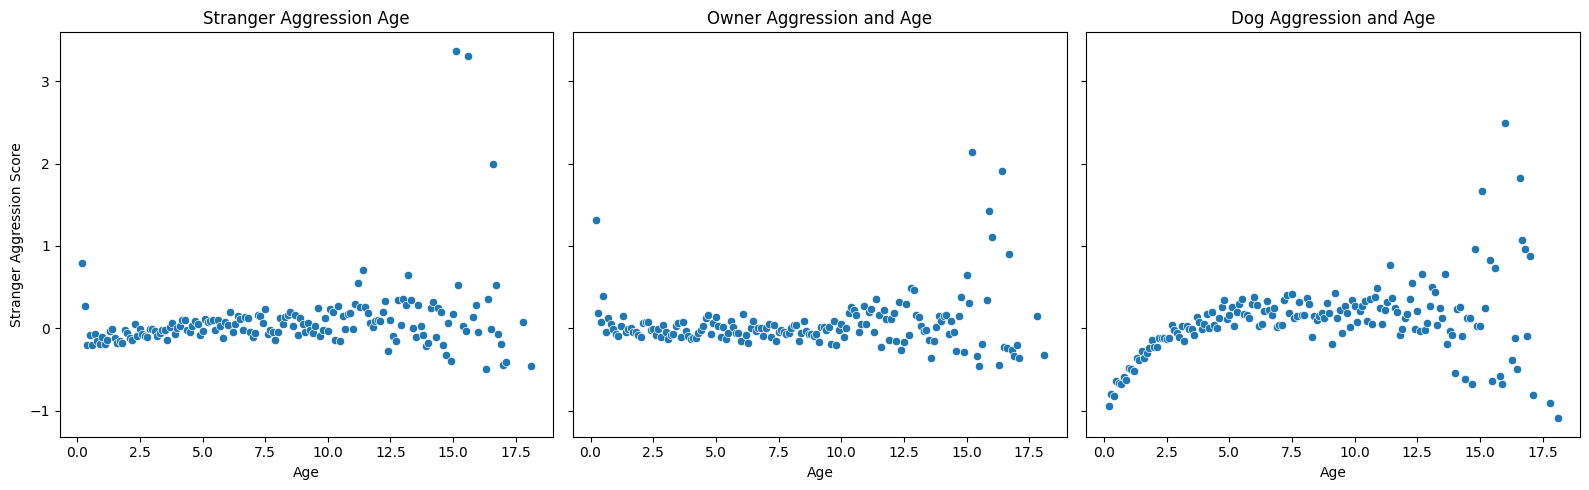

In [8]:
# print(dogs.shape)
# print(len(dogs.transpose()))

# dogs_demographic = dogs.transpose().iloc[0:12]
# dogs_environment = dogs.transpose().iloc[12:43]
# dogs_personality = dogs.transpose().iloc[43:113]
# dogs_noise_sensitivity = dogs.transpose().iloc[113:155]
# dogs_fearfullness = dogs.transpose().iloc[155:190]
# dogs_aggression = dogs.transpose().iloc[190:215]
# dogs_fear_surfaces = dogs.transpose().iloc[215:223]
# dogs_fear_surfaces = dogs.transpose().iloc[223:233]
# dogs_inattention = dogs.transpose().iloc[233:250]

psy = dogs.copy(deep=True)
psy["Aggression_age"] = psy["Aggression_age"].round(1)
a = psy.groupby("Aggression_age")["stranger_aggression_score"].mean()
a = pd.DataFrame(a)

b = psy.groupby("Aggression_age")["owner_aggression_score"].mean()
b = pd.DataFrame(b)


c = psy.groupby("Aggression_age")["dog_aggression_score"].mean()
c = pd.DataFrame(c)


ax = sns.histplot(data=psy, x="Aggression_age")


figure, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
sns.scatterplot(x=a.index, y=a["stranger_aggression_score"], ax=axes[0])
axes[0].set_title("Stranger Aggression Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Stranger Aggression Score")

# Scatterplot 2
sns.scatterplot(x=b.index, y=b["owner_aggression_score"], ax=axes[1])
axes[1].set_title("Owner Aggression and Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Owner Aggression Score")

# Scatterplot 3
sns.scatterplot(x=c.index, y=c["dog_aggression_score"], ax=axes[2])
axes[2].set_title("Dog Aggression and Age")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Dog Aggression Score")

plt.tight_layout()
plt.show()


### Ku grafom vyssie treba povedat
a ukazat s histogramom, ze hodnot do priemeru vo vyssich vekoch je malo, a preto su priemery rozlieatane a nespolahlive, takze trendy treba sledovat na zaciatku kde mame vela hodnot.

In [9]:
# kastracia_demographic = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[:12]
# kastracia_environment = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[12:43]
# kastracia_personality = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[43:113]
# kastracia_noise_sensitivity = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[113:155]
# kastracia_fearfullness = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[155:190]
# kastracia_aggression = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[190:215]
# kastracia_fear_surfaces = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[215:223]
# kastracia_fear_surfaces = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[223:233]
# kastracia_inattention = dogs.groupby("sterilization_status").mean(numeric_only=True).transpose().iloc[233:]

# kastracia_environment["sterilization_status"] = kastracia_environment.index
# kastracia_environment.index.name = "index"
# kastracia_environment.columns.name = None
# display(kastracia_environment)

# kastracia_personality["sterilization_status"] = kastracia_personality.index
# kastracia_personality.index.name = "index"
# kastracia_personality.columns.name = None
# display(kastracia_personality)
# kastracia_1["sterilization_status"] = kastracia_1.index
# kastracia_1.index.name = "index"
# kastracia_1.columns.name = None
# display(kastracia_1)
# kastracia_1["sterilization_status"] = kastracia_1.index
# kastracia_1.index.name = "index"
# kastracia_1.columns.name = None
# display(kastracia_1)
# kastracia_1["sterilization_status"] = kastracia_1.index
# kastracia_1.index.name = "index"
# kastracia_1.columns.name = None
# display(kastracia_1)

### Teraz spravim podobne impulzivitu a nepozornost
nasiel som jemnu zavislost, impulzivita stupa a vrcholi okolo 1 roka, potom pomaly klesa, nepozornost je na tom velmi podobne



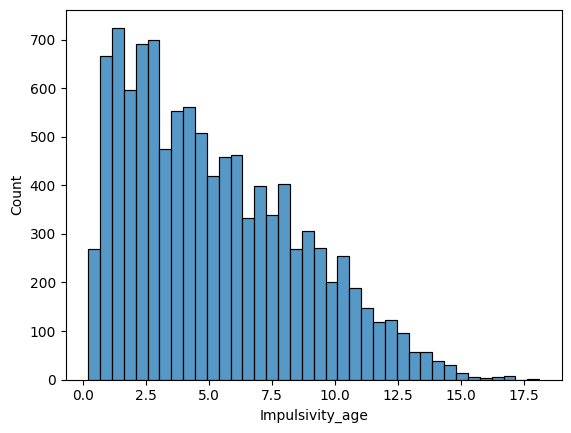

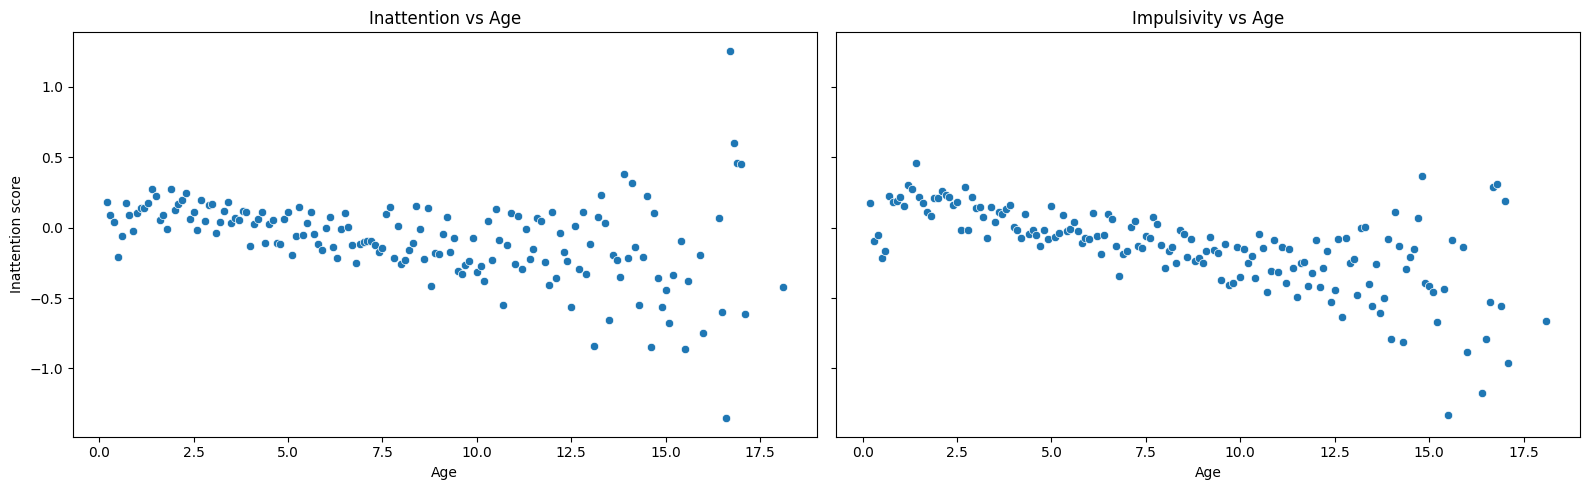

In [10]:
psy2 = dogs.copy(deep=True)
psy2["Impulsivity_age"] = psy2["Impulsivity_age"].round(1)
d = psy2.groupby("Impulsivity_age")["inattention_score"].mean()
d = pd.DataFrame(d)

e = psy2.groupby("Impulsivity_age")["impulsivity_score"].mean()
e = pd.DataFrame(e)




ax = sns.histplot(data=psy2, x="Impulsivity_age")


figure, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
sns.scatterplot(x=d.index, y=d["inattention_score"], ax=axes[0])
axes[0].set_title("Inattention vs Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Inattention score")

# Scatterplot 2
sns.scatterplot(x=e.index, y=e["impulsivity_score"], ax=axes[1])
axes[1].set_title("Impulsivity vs Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Impulsivity Score")



plt.tight_layout()
plt.show()

### Teraz spravim podobne strach
pri strachu ale nevidim ziadnu suvislost




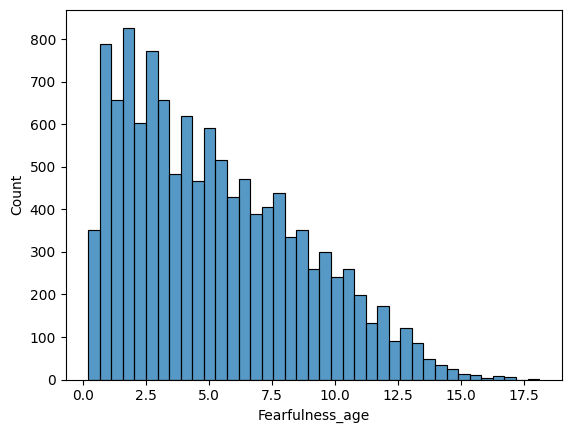

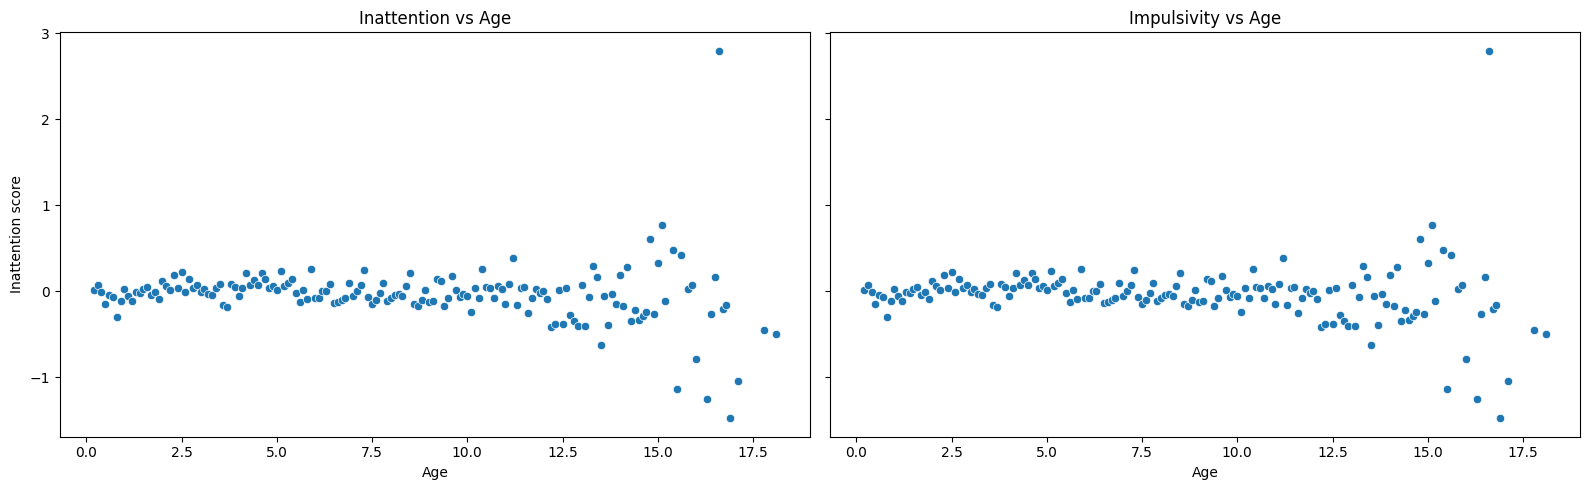

In [11]:
psy3 = dogs.copy(deep=True)
psy3["Fearfulness_age"] = psy3["Fearfulness_age"].round(1)
f = psy3.groupby("Fearfulness_age")["fearfulness_score"].mean()
f = pd.DataFrame(f)





ax = sns.histplot(data=psy3, x="Fearfulness_age")


figure, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)
sns.scatterplot(x=f.index, y=f["fearfulness_score"], ax=axes[0])
axes[0].set_title("Inattention vs Age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Inattention score")

# Scatterplot 2
sns.scatterplot(x=f.index, y=f["fearfulness_score"], ax=axes[1])
axes[1].set_title("Impulsivity vs Age")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Impulsivity Score")



plt.tight_layout()
plt.show()

### Priemerne hmotnosti jednotlivych plemien barplot


,sex,sterilization_status,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,Personality_age,weight_kg,...,Vas_8_excessive,Vas_9_alwaysplay,Vas_10_complicatedtasks,Vas_11_reacthastily,Vas_12_easilydistracted,Vas_13_cannotwait,impulsive,impulsiveness_disturbes,inattention_score,impulsivity_score
breed_group,,,,,,,,,,,,,,,,,,,,,
Other_breed,122,122,98,100,92,85,88,80,109,103,...,80,80,80,80,80,80,73,80,80,80
Scenthounds,125,125,108,102,96,88,88,89,106,115,...,89,89,89,89,89,89,86,89,89,89
Livestock_guardian_dogs,128,128,113,97,104,91,91,85,100,120,...,85,85,85,85,85,85,82,84,85,85
Schapendoes,130,130,120,113,106,104,105,99,109,115,...,99,99,99,99,99,99,88,98,99,99
Nova_Scotia_Duck_Tolling_Retriever,170,170,142,129,127,120,120,117,146,149,...,117,117,117,117,117,117,109,117,117,117
Collie_Smooth,173,173,163,148,146,145,144,137,151,158,...,137,137,137,137,137,137,128,136,137,137
Teacup_dogs,177,177,148,141,134,124,128,122,148,158,...,122,122,122,122,122,122,121,121,122,122
Chinese_Crested_Dog,181,181,155,145,140,131,135,125,141,157,...,125,125,125,125,125,125,117,125,125,125
Pinschers_Schnauzers,182,182,166,159,155,142,144,142,158,160,...,140,140,140,140,140,140,134,140,140,140


<Axes: ylabel='Count'>

/home/timotej/.pyenv/versions/3.13.3/lib/python3.13/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


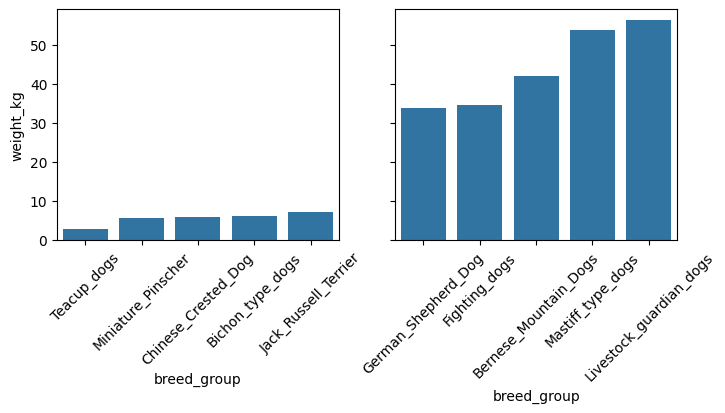

/home/timotej/.pyenv/versions/3.13.3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


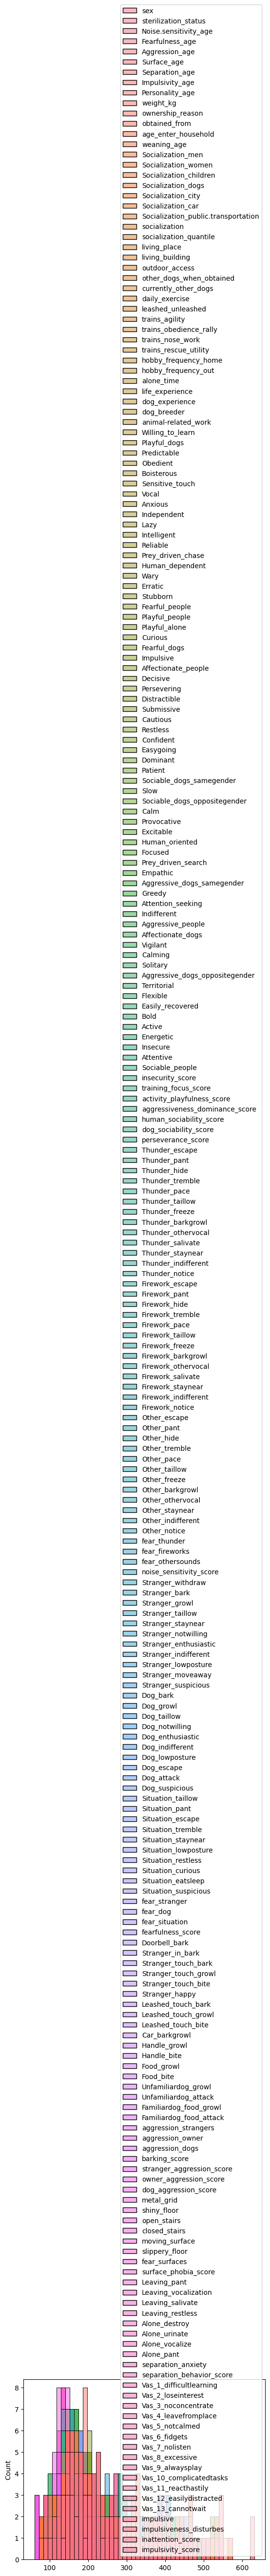

In [ ]:

psy_hmostnost_max = pd.DataFrame(dogs.groupby('breed_group')['weight_kg'].mean().sort_values()).head()
psy_hmostnost_min = pd.DataFrame(dogs.groupby('breed_group')['weight_kg'].mean().sort_values()).tail()

figure, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
sns.barplot(data=psy_hmostnost_max, x=psy_hmostnost_max.index, y='weight_kg', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=psy_hmostnost_min, x=psy_hmostnost_min.index, y='weight_kg', ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)

figure, axes1 = plt.subplots(1, 1)

pocty_psov = pd.DataFrame(dogs.groupby("breed_group").count().sort_values(by="sex"))
display(pocty_psov)
# sns.histplot(data=pocty_psov, ax=axes1)